# 2.3.8 신경망(딥러닝)
- 신경망이라 알려진 알고리즘들은 최근 '딥러닝'이란 이름으로 다시 주목받고 있음.
- 딥러닝이 많은 머신러닝 애플리케이션에서 매우 희망적인 성과를 보여주고 있지만, 특정 분야에 정교하게 적용되어 있을 때가 많음.
- 여기서는 복잡한 딥러닝 알고리즘의 출발점이며 비교적 간단하게 분류와 회귀에 쓸 수 있는 다층 퍼셉트론(MLP)을 다루겠음.

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import matplotlib
import graphviz

matplotlib.rcParams['axes.unicode_minus'] = False
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

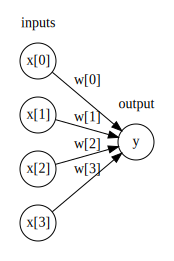

In [2]:
display(mglearn.plots.plot_logistic_regression_graph())

-> 입력 특성과 예측은 노드로, 계수는 노드 사이의 연결로 나타낸 로지스틱 회귀

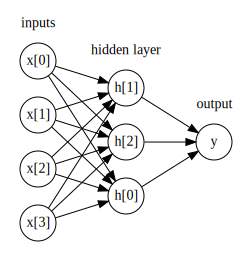

In [3]:
display(mglearn.plots.plot_single_hidden_layer_graph())

-> 은닉층이 하나인 다층 퍼셉트론

Text(0,0.5,'relu(x), tanh(x)')

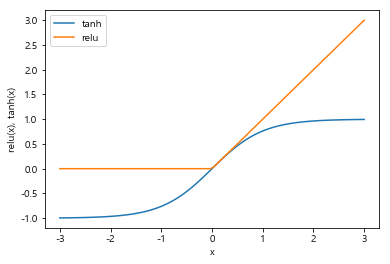

In [4]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

-> 하이퍼볼릭 탄젠트 활성화 함수와 렐루 활성화 함수

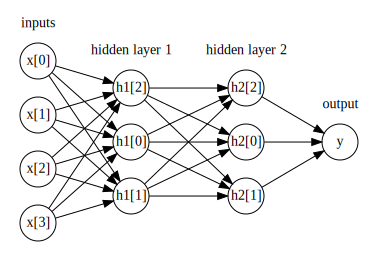

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()

## 신경망 튜닝

Text(0,0.5,'특성 1')

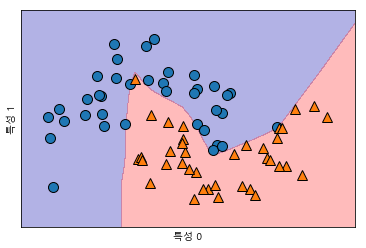

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

-> 은닉 유닛이 100개인 신경망으로 학습시킨 two_moons 데이터셋의 결정 경계

Text(0,0.5,'특성 1')

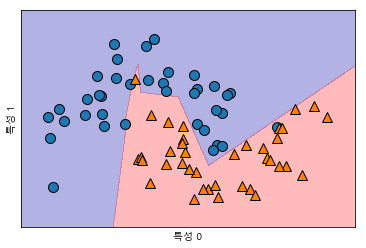

In [7]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

-> 은닉 유닛이 10개인 신경망으로 학습시킨 two_moons 데이터셋의 결정 경계

Text(0,0.5,'특성 1')

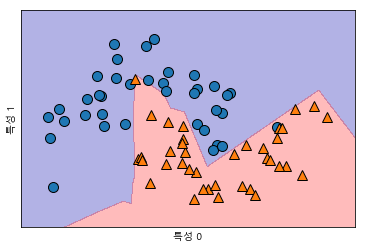

In [8]:
# 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

-> 10개의 은닉 유닛을 가진 두 개의 은닉층과 렐루 활성화 함수로 만든 결정 경계

Text(0,0.5,'특성 1')

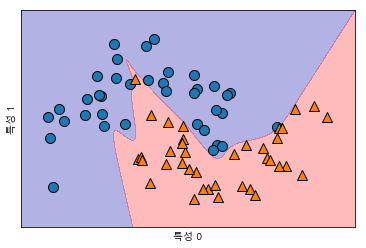

In [9]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

-> 10개의 은닉 유닛을 가진 두 개의 은닉층과 tanh 활성화 함수로 만든 결정 경계

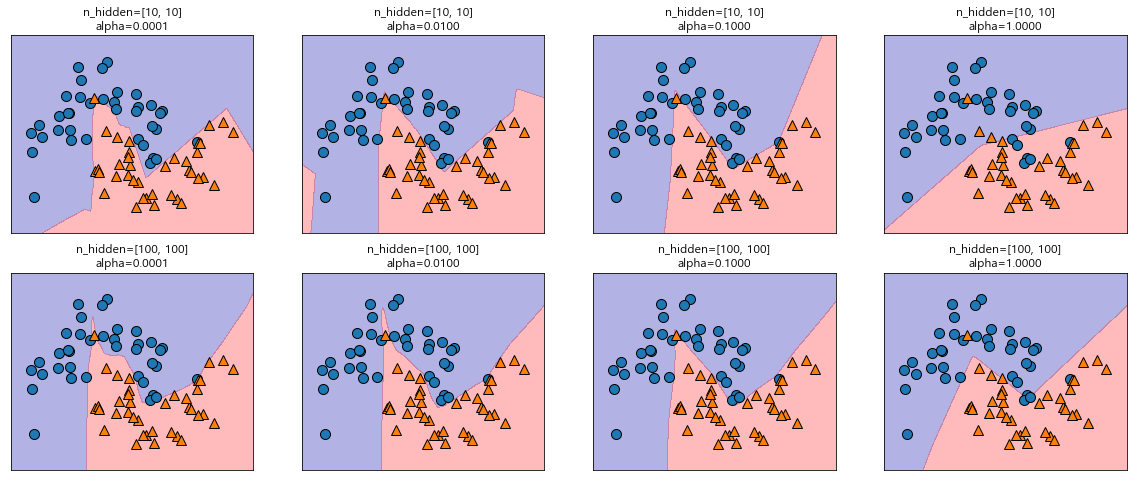

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                           hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                           alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

-> 은닉 유닛과 alpha 매개변수에 따라 변하는 결정 경계

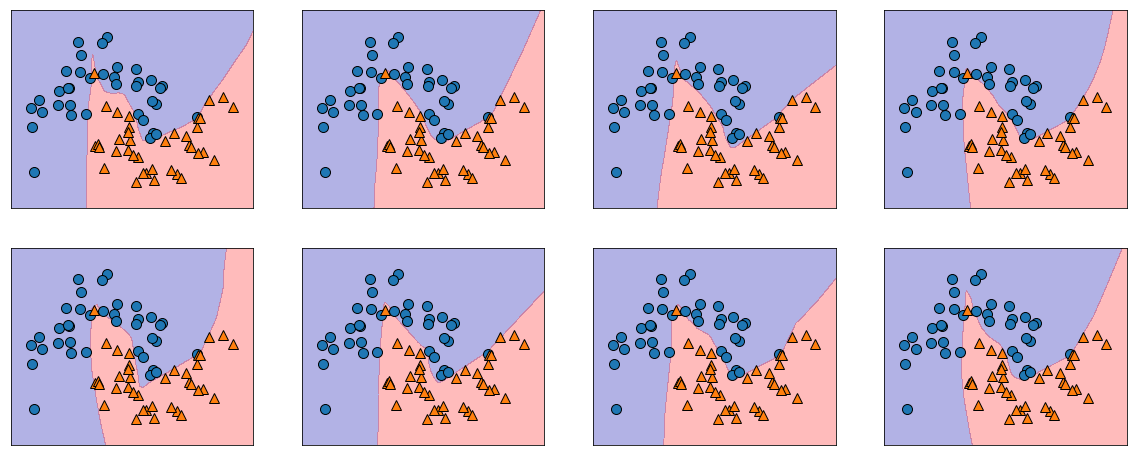

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                       hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

-> 무작위로 다룬 초깃값을 주되 같은 매개변수로 학습한 결정 경계

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("유방암 데이터의 특성별 최댓값:\n{}".format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최댓값:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.91
테스트 세트 정확도: 0.88


In [14]:
# 훈련 세트 각 특성의 평균을 계산합니다.
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산합니다.
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1인 데이터로 변환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 합니다.
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [15]:
# 반복 횟수 늘리기
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.993
테스트 세트 정확도: 0.972


In [16]:
# 모델의 복잡도를 낮춰서 일반화 성능 강화시키기
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


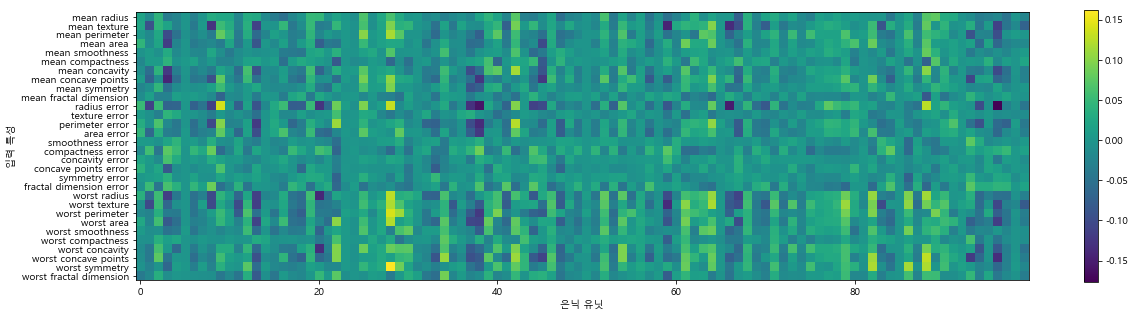

In [17]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()

-> 유방암 데이터셋으로 학습시킨 신경망의 첫 번째 층의 가중치 히트맵

### 장단점과 매개변수

- 대량의 데이터에 내재된 정보를 잡아내고 매우 복잡한 모델을 만들 수 있음.
- 하지만, 종종 학습이 오래 걸리며 데이터 전처리에 주의해야 함.
- 신경망에서 가장 중요한 매개변수는 은닉층의 개수와 각 은닉층의 유닛 수임.
- 신경망에서 매개변수를 조정하는 일반적인 방법은 먼저 충분히 과대적합되어서 문제를 해결할만한 큰 모델을 만듭니다.
- 그런 다음 훈련 데이터가 충분히 학습될 수 있다고 생각될 때 신경망 구조를 줄이거나 규제 강화를 위해 alpha 값을 증가시켜 일반화 성능을 향상시킴.